In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\python final project\malaria dataset.csv")

In [4]:
df.dropna(inplace=True)

In [41]:
df.drop_duplicates(inplace=True)

In [43]:
df.isnull().sum()

ISO3                   0
Name                   0
Admin Level            0
Metric                 0
Units                  0
Year                   0
Value                  0
Log_Value              0
ISO3_Encoded           0
Name_Encoded           0
Admin Level_Encoded    0
Metric_Encoded         0
Units_Encoded          0
dtype: int64

In [44]:
df.__dataframe__

<bound method DataFrame.__dataframe__ of      ISO3         Name Admin Level          Metric                    Units  \
0     AFG  Afghanistan      admin0  Incidence Rate       Cases per Thousand   
1     AFG  Afghanistan      admin0  Incidence Rate       Cases per Thousand   
2     AFG  Afghanistan      admin0  Incidence Rate       Cases per Thousand   
3     AFG  Afghanistan      admin0  Incidence Rate       Cases per Thousand   
4     AFG  Afghanistan      admin0  Incidence Rate       Cases per Thousand   
...   ...          ...         ...             ...                      ...   
3493  ZWE     Zimbabwe      admin0  Mortality Rate  Deaths per 100 Thousand   
3494  ZWE     Zimbabwe      admin0  Mortality Rate  Deaths per 100 Thousand   
3495  ZWE     Zimbabwe      admin0  Mortality Rate  Deaths per 100 Thousand   
3496  ZWE     Zimbabwe      admin0  Mortality Rate  Deaths per 100 Thousand   
3497  ZWE     Zimbabwe      admin0  Mortality Rate  Deaths per 100 Thousand   

      Year

In [45]:
df_cleaned = df.copy()# Make sure you have a DataFrame named df_cleaned before saving
df.to_csv('cleaned_data.csv', index=False)

In [5]:
df.columns = df.columns.str.strip()
df['Admin Level'] = df['Admin Level'].str.strip()
df['Metric'] = df['Metric'].str.strip()
df['Units'] = df['Units'].str.strip()

In [6]:
df['Log_Value'] = np.log1p(df['Value']) 

In [7]:
label_encoders = {}
for col in ['ISO3', 'Name', 'Admin Level', 'Metric', 'Units']:
    le = LabelEncoder()
    df[col + '_Encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
scaler = StandardScaler()
df['Value_Scaled'] = scaler.fit_transform(df[['Value']])
df['Log_Value_Scaled'] = scaler.fit_transform(df[['Log_Value']])

In [9]:
print(df.head())

  ISO3         Name Admin Level          Metric               Units  Year  \
0  AFG  Afghanistan      admin0  Incidence Rate  Cases per Thousand  2010   
1  AFG  Afghanistan      admin0  Incidence Rate  Cases per Thousand  2011   
2  AFG  Afghanistan      admin0  Incidence Rate  Cases per Thousand  2012   
3  AFG  Afghanistan      admin0  Incidence Rate  Cases per Thousand  2013   
4  AFG  Afghanistan      admin0  Incidence Rate  Cases per Thousand  2014   

      Value  Log_Value  ISO3_Encoded  Name_Encoded  Admin Level_Encoded  \
0  1.176667   0.777795             0             0                    0   
1  1.053869   0.719725             0             0                    0   
2  0.213129   0.193203             0             0                    0   
3  0.367701   0.313131             0             0                    0   
4  0.653501   0.502895             0             0                    0   

   Metric_Encoded  Units_Encoded  Value_Scaled  Log_Value_Scaled  
0               0  

In [10]:
desc_stats = df[['Value', 'Log_Value']].describe()
print("Descriptive Statistics:\n", desc_stats)


Descriptive Statistics:
              Value    Log_Value
count  3498.000000  3498.000000
mean     39.754021     1.699167
std      87.650217     1.998577
min       0.000000     0.000000
25%       0.000106     0.000106
50%       0.649028     0.500183
75%      29.595486     3.420847
max     571.289202     6.349644


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

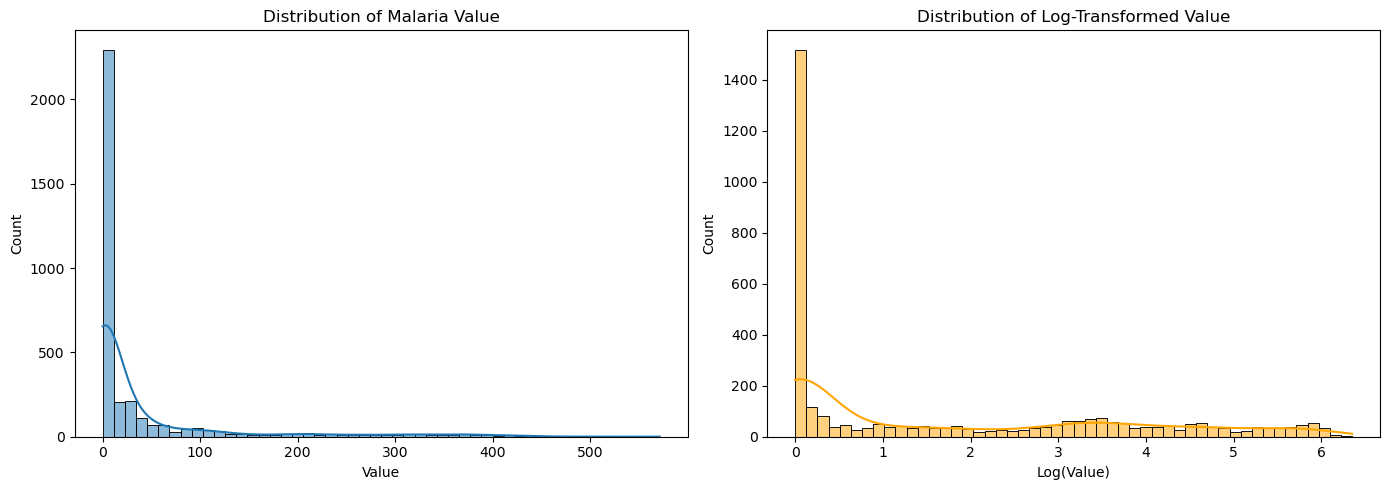

In [12]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution of Malaria Value')
plt.xlabel('Value')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Value'], bins=50, kde=True, color='orange')
plt.title('Distribution of Log-Transformed Value')
plt.xlabel('Log(Value)')

plt.tight_layout()
plt.show()

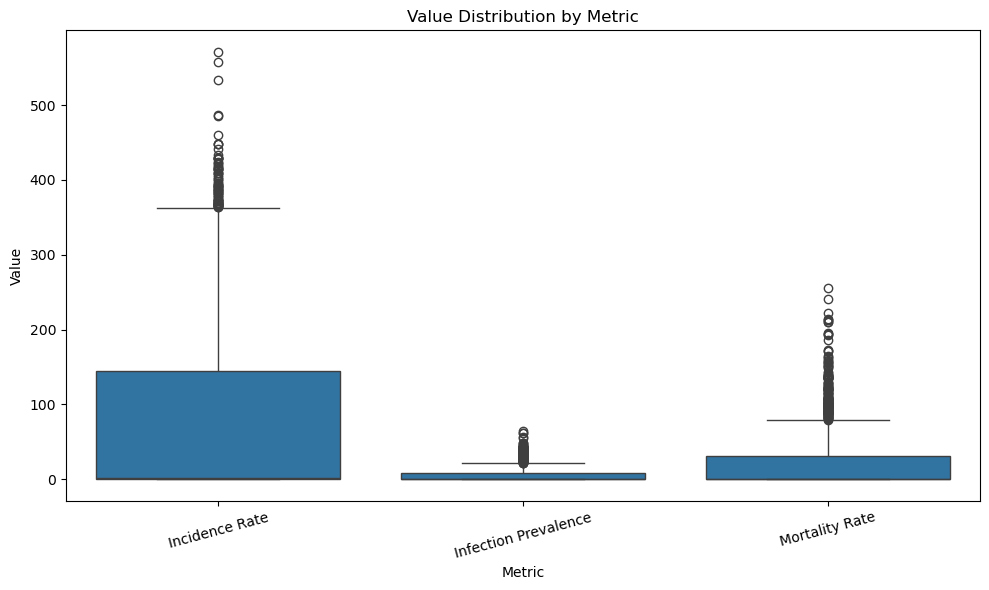

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Value', data=df)
plt.title('Value Distribution by Metric')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


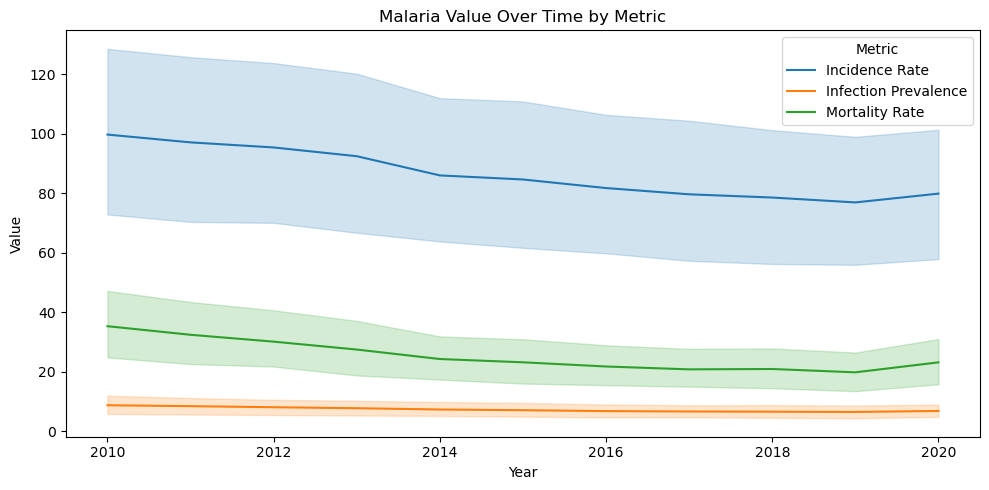

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Value', hue='Metric')
plt.title('Malaria Value Over Time by Metric')
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df = pd.read_csv("malaria dataset.csv")

In [46]:
df['Log_Value'] = np.log1p(df['Value'])

In [17]:
label_columns = ['ISO3', 'Name', 'Admin Level', 'Metric', 'Units']
for col in label_columns:
    le = LabelEncoder()
    df[col + '_Encoded'] = le.fit_transform(df[col])


In [18]:
features = ['ISO3_Encoded', 'Name_Encoded', 'Admin Level_Encoded',
            'Metric_Encoded', 'Units_Encoded', 'Year']
X = df[features]
y = df['Value'] 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [23]:
print("Mean Squared Error (MSE):", mse)
print("R² Score (Accuracy):", r2)

Mean Squared Error (MSE): 138.50624846942083
R² Score (Accuracy): 0.9832442388262332


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [26]:
print("Model Evaluation Results:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score (Accuracy):", round(r2, 4))

Model Evaluation Results:
Mean Absolute Error (MAE): 3.94
Mean Squared Error (MSE): 138.51
Root Mean Squared Error (RMSE): 11.77
R² Score (Accuracy): 0.9832


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
def load_and_preprocess(filepath):
    """Load dataset and apply preprocessing: log transformation and label encoding."""
    df = pd.read_csv(r"C:\Users\user\Desktop\python final project\malaria dataset.csv")


In [28]:
 df['Log_Value'] = np.log1p(df['Value'])

In [29]:
def load_and_preprocess(filepath):
    """Load dataset and apply preprocessing: log transformation and label encoding."""
    df = pd.read_csv(r"C:\Users\user\Desktop\python final project\malaria dataset.csv")
    df['Log_Value'] = np.log1p(df['Value'])
    label_columns = ['ISO3', 'Name', 'Admin Level', 'Metric', 'Units']
    for col in label_columns:
        le = LabelEncoder()
        df[col + '_Encoded'] = le.fit_transform(df[col])
    return df

In [30]:
def train_model(df, target='Value'):
    """Train a Random Forest model using encoded features."""
    features = ['ISO3_Encoded', 'Name_Encoded', 'Admin Level_Encoded',
                'Metric_Encoded', 'Units_Encoded', 'Year']
    
    X = df[features]
    y = df[target]


In [69]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def train_model(df, target='Value'):
    """Train a Random Forest model using encoded features."""
    features = ['ISO3_Encoded', 'Name_Encoded', 'Admin Level_Encoded',
                'Metric_Encoded', 'Units_Encoded', 'Year']
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model, X_test, y_test


In [32]:
def evaluate_model(model, X_test, y_test):
    """Evaluate the model and return common regression metrics."""
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

In [33]:
 print("📈 Model Evaluation Metrics:")
 print(f"Mean Absolute Error (MAE): {mae:.2f}")
 print(f"Mean Squared Error (MSE): {mse:.2f}")
 print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score (Accuracy): {r2:.4f}")


📈 Model Evaluation Metrics:
Mean Absolute Error (MAE): 3.94
Mean Squared Error (MSE): 138.51
Root Mean Squared Error (RMSE): 11.77
R² Score (Accuracy): 0.9832


In [34]:
if __name__ == "__main__":
    filepath = "malaria dataset.csv"

In [35]:
 print("🔄 Loading and Preprocessing Data...")
df = load_and_preprocess(r"C:\Users\user\Desktop\python final project\malaria dataset.csv")


🔄 Loading and Preprocessing Data...


In [36]:
 print("🚧 Training the Model...")
 model, X_test, y_test = train_model(df)

🚧 Training the Model...


In [37]:
print("✅ Evaluating the Model...")
evaluate_model(model, X_test, y_test)

✅ Evaluating the Model...


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [82]:
def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)
    df['Log_Value'] = np.log1p(df['Value'])

In [85]:
for col in ['ISO3', 'Name', 'Admin Level', 'Metric', 'Units']:
        df[col + '_Encoded'] = LabelEncoder().fit_transform(df[col])



In [86]:
def train_stacked_model(df, target='Value'):
    features = ['ISO3_Encoded', 'Name_Encoded', 'Admin Level_Encoded',
                'Metric_Encoded', 'Units_Encoded', 'Year']
    X = df[features]
    y = df[target]

In [87]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
 base_models = [
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('et', ExtraTreesRegressor(n_estimators=100, random_state=42))
    ]


In [89]:
  meta_model = Ridge(alpha=1.0)

In [93]:

def train_stacked_model(X_train, y_train, X_test, y_test, base_models, meta_model):
    stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)
    stacked_model.fit(X_train, y_train)
    return stacked_model, X_test, y_test


In [94]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

In [95]:
 print("📈 Stacked Model Evaluation:")
 print(f"MAE:  {mae:.2f}")
 print(f"MSE:  {mse:.2f}")
 print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


📈 Stacked Model Evaluation:
MAE:  3.94
MSE:  138.51
RMSE: 11.77
R²:   0.9832


In [ ]:
 import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    StackingRegressor
)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
 base_models = [
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('et', ExtraTreesRegressor(n_estimators=100, random_state=42))
    ]

In [5]:
 meta_model = Ridge(alpha=1.0)


In [9]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

In [ ]:
def plot_feature_importance(model, feature_names):
    
    try:
        importances = model.named_estimators_['rf'].feature_importances_
    except AttributeError:
        print(" Feature importance not available.")
        return

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

🔄 Loading and Preprocessing Data...
⚙️ Training Custom Stacked Ensemble...
✅ Evaluating Ensemble Model...

📈 Model Evaluation Metrics:
MAE:  4.15
MSE:  84.99
RMSE: 9.22
R²:   0.9897
📊 Visualizing Feature Importances...


C:\Users\user\AppData\Local\Temp\ipykernel_25560\2300992460.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_25560\2300992460.py:85: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\user\anaconda4\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


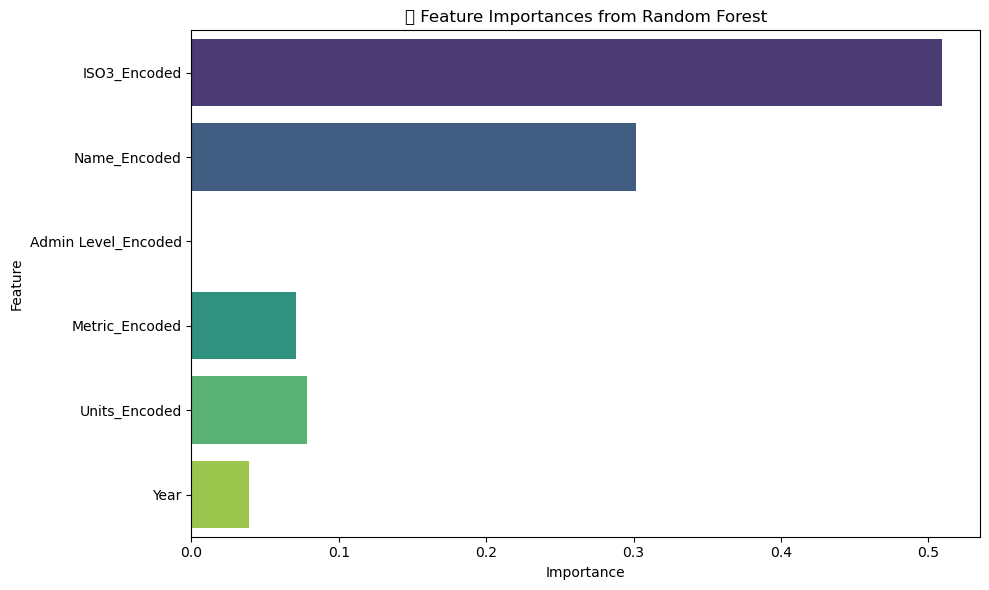

In [ ]:
_# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    StackingRegressor
)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🧹 1. Load and Preprocess the Data
def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)

    # Log transform the target value to handle skewness
    df['Log_Value'] = np.log1p(df['Value'])

    # Encode categorical features
    for col in ['ISO3', 'Name', 'Admin Level', 'Metric', 'Units']:
        df[col + '_Encoded'] = LabelEncoder().fit_transform(df[col])
    
    return df


def train_stacked_model(df, target='Value'):
    features = ['ISO3_Encoded', 'Name_Encoded', 'Admin Level_Encoded',
                'Metric_Encoded', 'Units_Encoded', 'Year']
    X = df[features]
    y = df[target]

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    base_models = [
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('et', ExtraTreesRegressor(n_estimators=100, random_state=42))
    ]


    meta_model = Ridge(alpha=1.0)\\


    model = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)
    model.fit(X_train, y_train)

    return model, X_test, y_test, X_train.columns


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\n📈 Model Evaluation Metrics:")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")


def plot_feature_importance(model, feature_names):
    
    try:
        importances = model.named_estimators_['rf'].feature_importances_
    except AttributeError:
        print("⚠️ Feature importance not available.")
        return


    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=feature_names, palette='viridis')
    plt.title("🔍 Feature Importances from Random Forest")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("🔄 Loading and Preprocessing Data...")
    df = load_and_preprocess("malaria dataset.csv")

    print("⚙️ Training Custom Stacked Ensemble...")
    model, X_test, y_test, feature_names = train_stacked_model(df, target='Value')

    print("✅ Evaluating Ensemble Model...")
    evaluate_model(model, X_test, y_test)

    print("📊 Visualizing Feature Importances...")
    plot_feature_importance(model, feature_names)
